In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
sns.set()

In [2]:
data = pd.read_excel("Concrete_Data.xls")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.shape

(1030, 9)

In [6]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Data Description
Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

```
Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable 

```

In [5]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

There is no null values in the dataframe

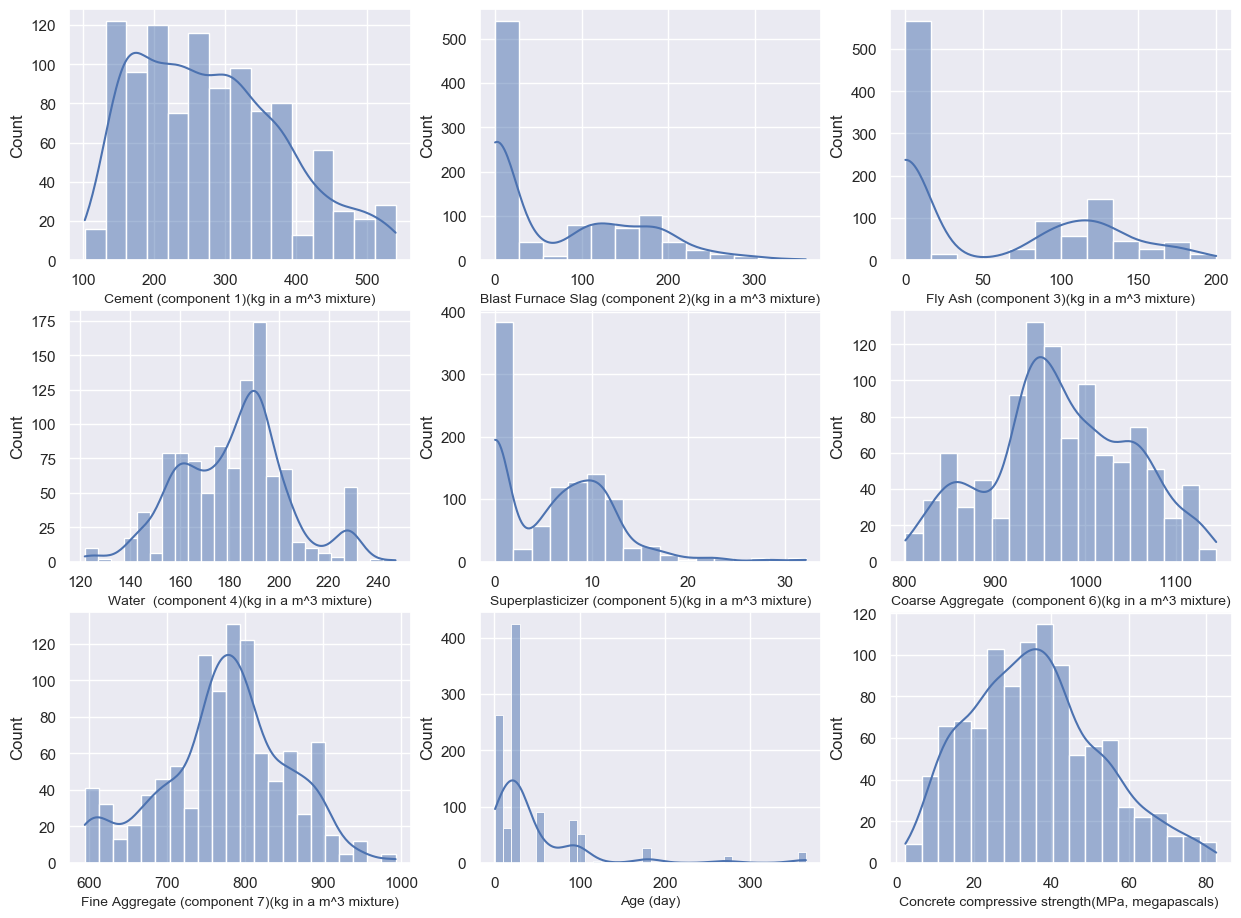

In [14]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(data[column], kde=True)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

There is skewness in the data. Since the size of the dataset is small, therfore I am not removing skewness, just to keep all the information that the data offers. Let's use the data as it is.
If we feel the need of dealing with skewness, we will come back and do the required pre processing.

## Data Transformation

Selecting independent and dependent features.

In [6]:
X = data.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)

In [7]:
y = data['Concrete compressive strength(MPa, megapascals) ']

Visualizing the independent features after apply log transformation into them.

In [8]:
# before doing the log transformation, 
# let's add 1 to each value in everycolumn so that we don't get exception while calculationg the log for value 0

for column in X.columns:
    X[column]+=1
    X[column] = np.log(X[column])

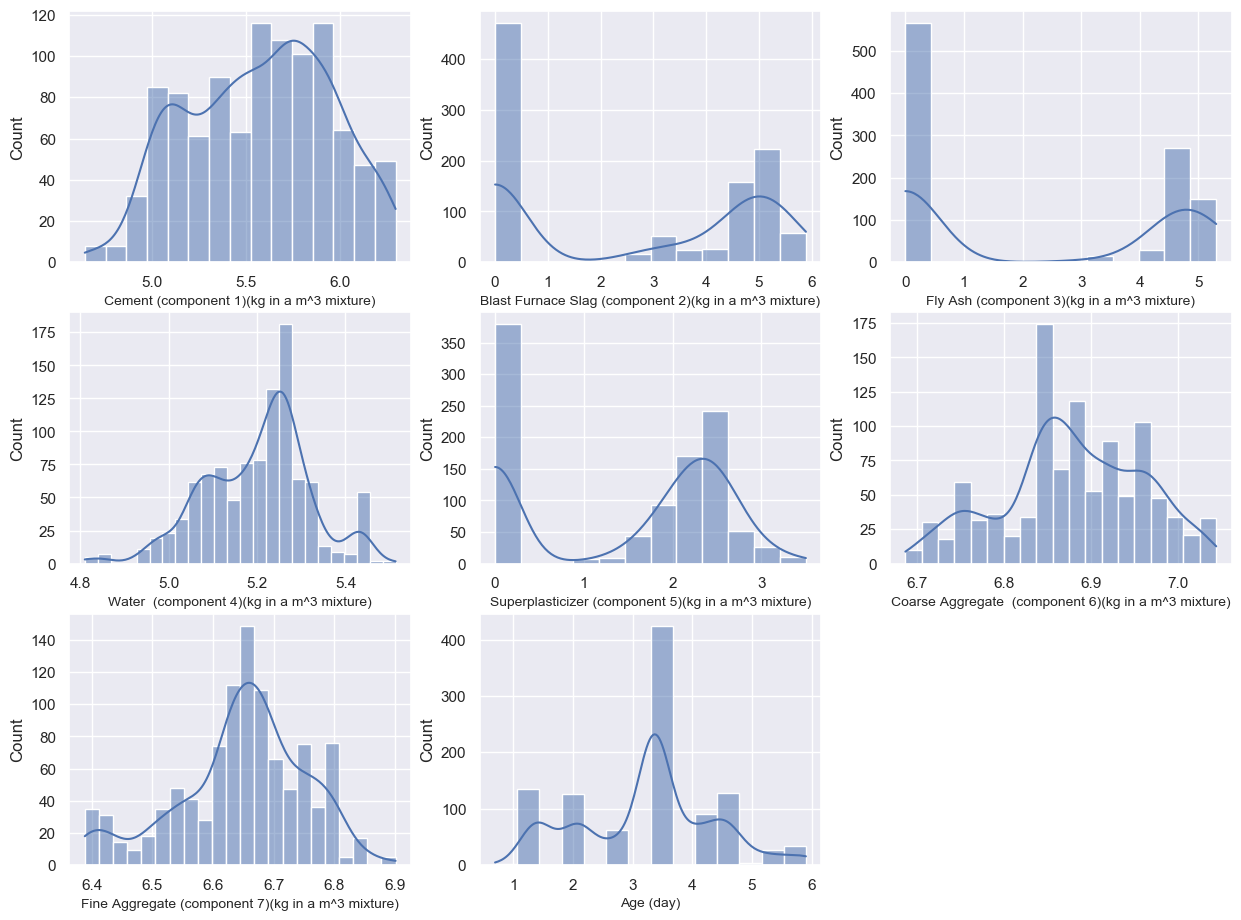

In [19]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.histplot(X[column], kde=True)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

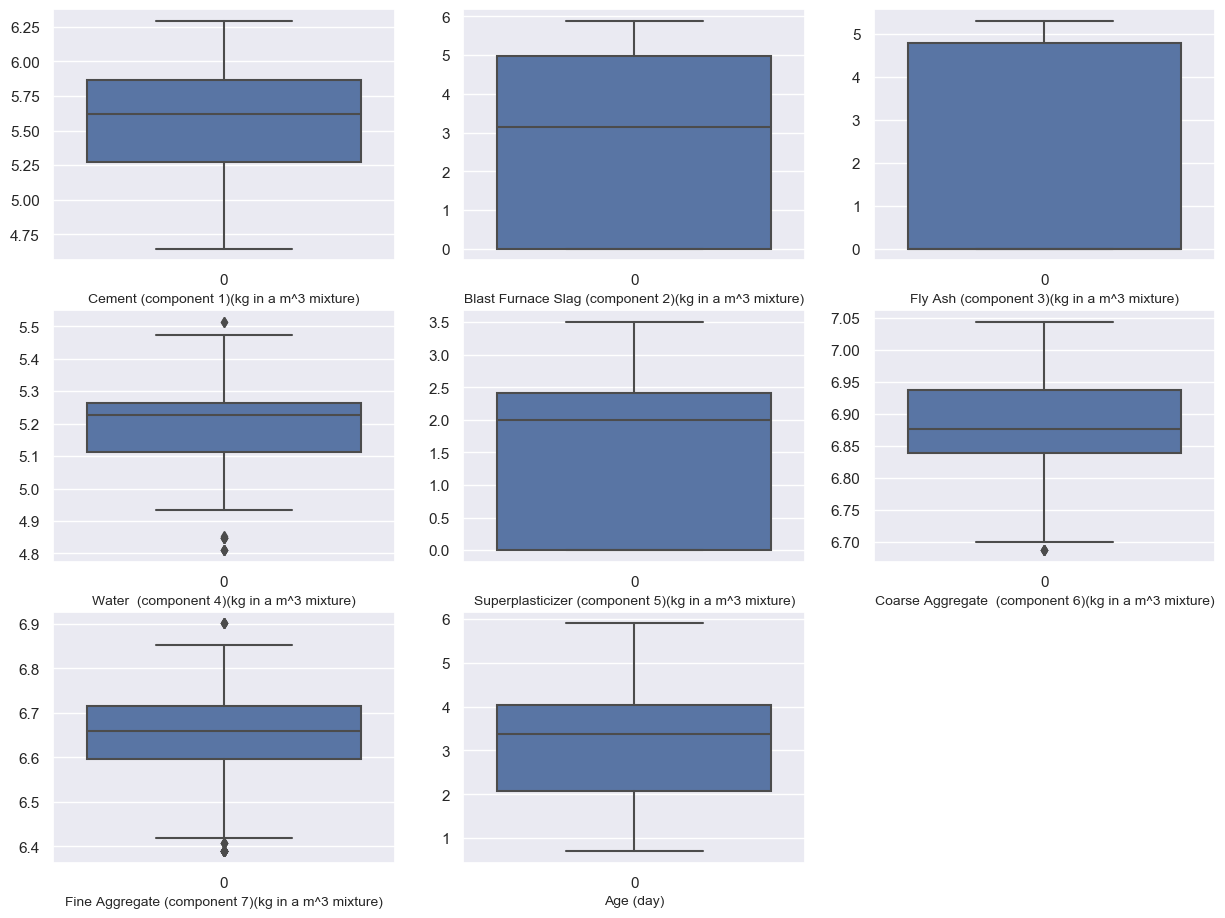

In [20]:
# let's check for outliers 

plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    #data[column]+=1
    sns.boxplot((X[column]))
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

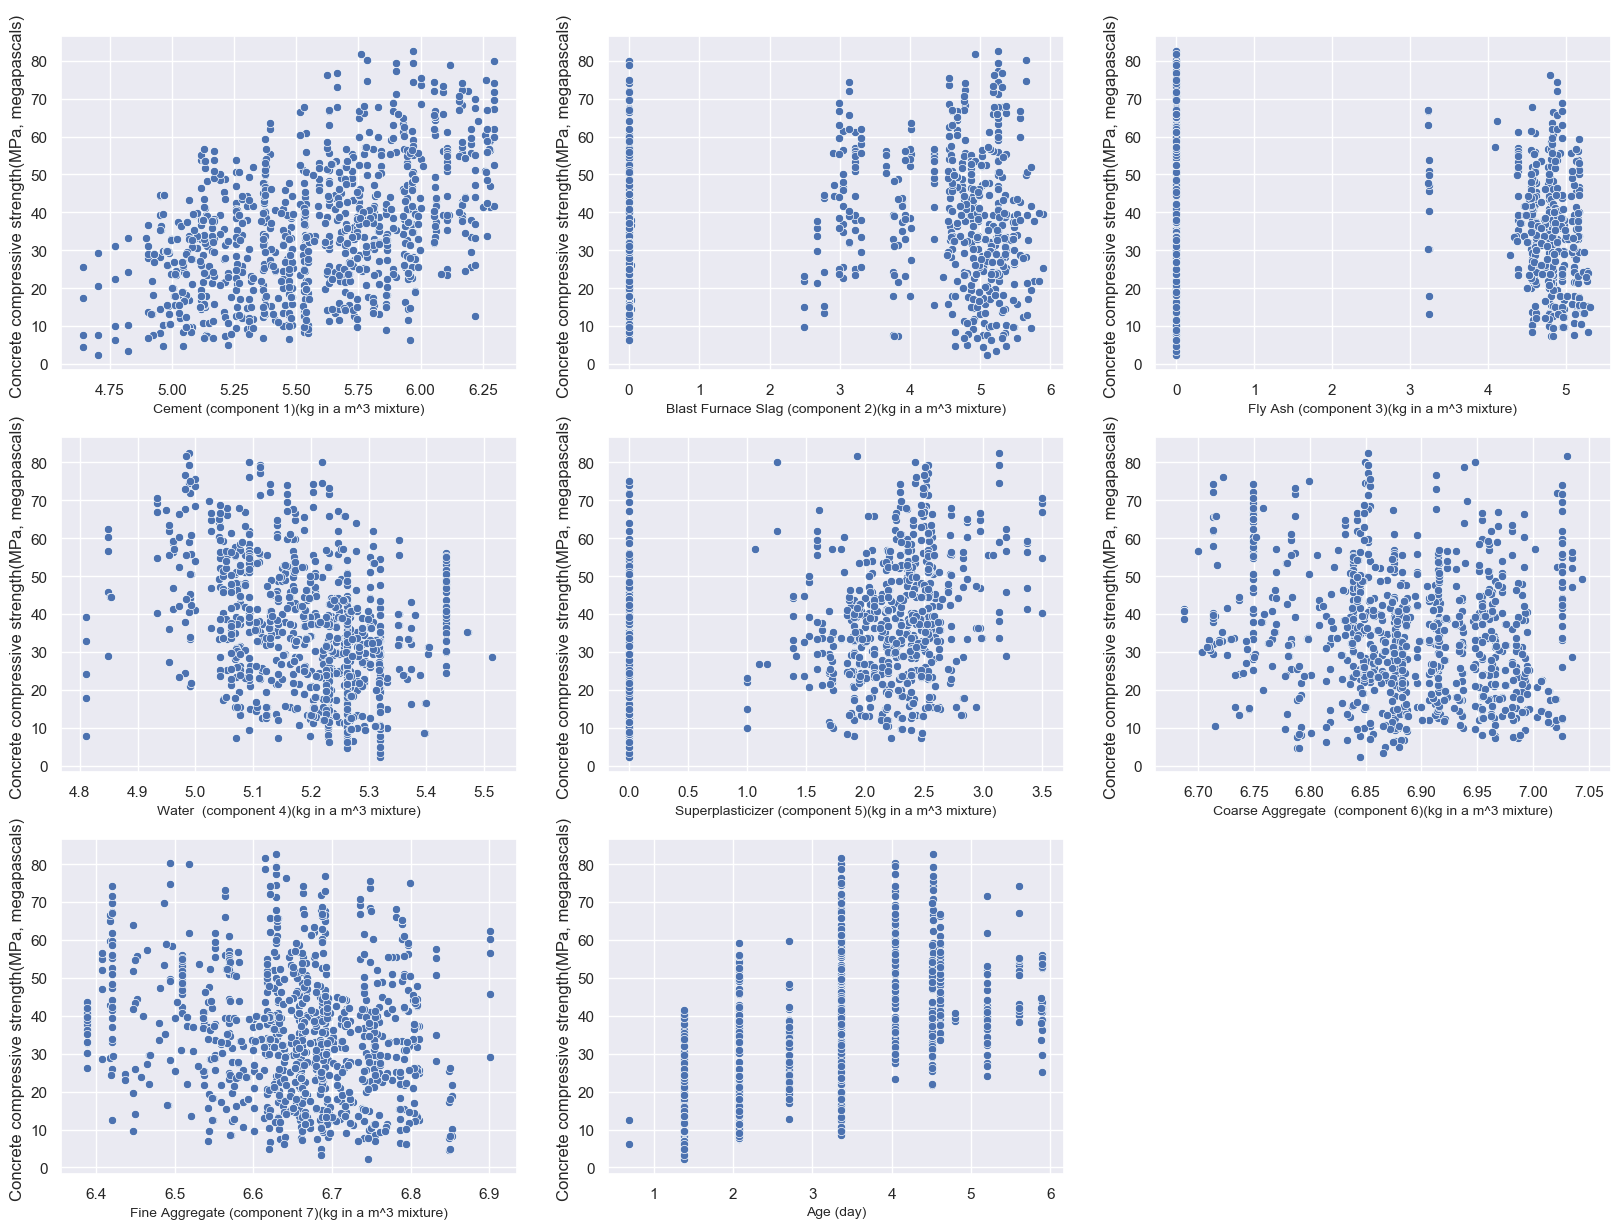

In [23]:
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.scatterplot(x=X[column],y=y)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data.
We will also perform Random forest regressor and compare our results from both the models.

In [178]:
# let's check for correaltion using heatmap

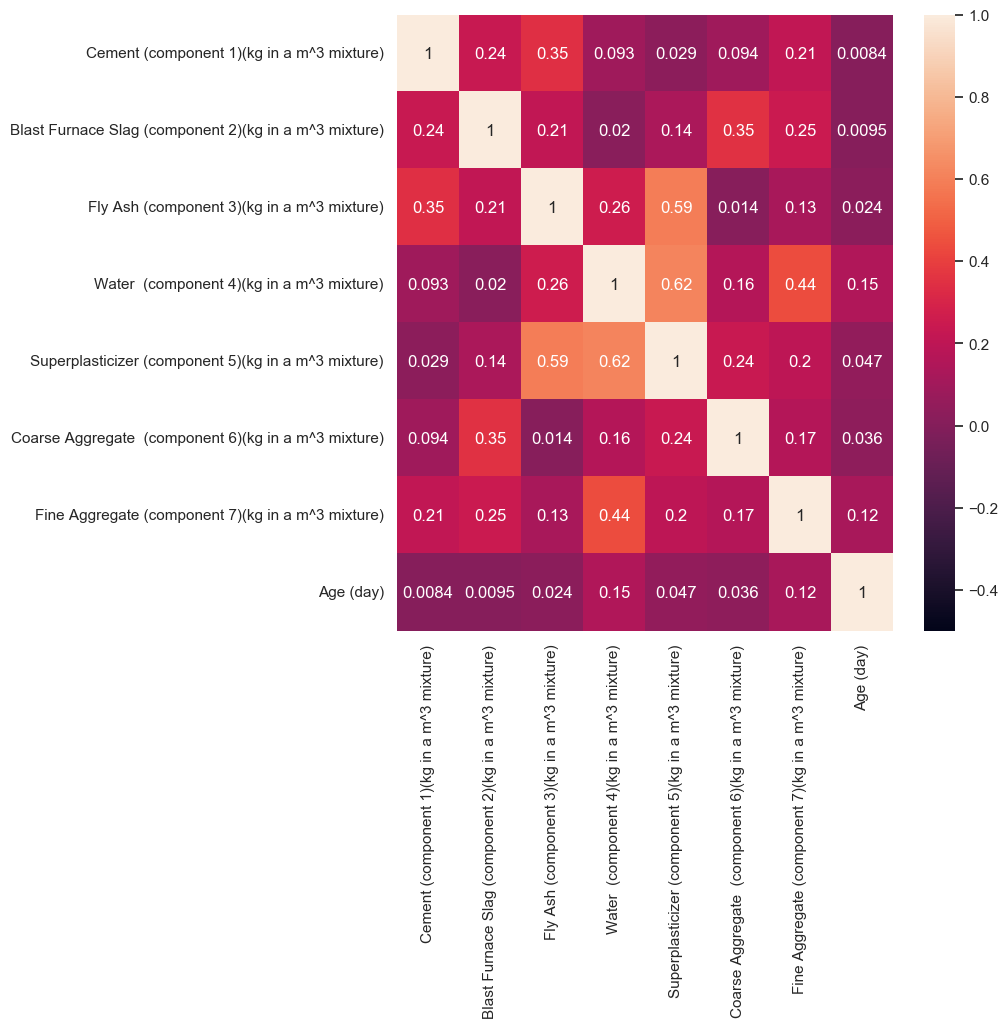

In [24]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) #matplotlib  3.0.3 , ther is an issue with 3.1.1 , annotation gets cut from top and bottom


Great! none of our columns seem to be correlated.

### Splitting the data into train and test sets and scaling them.

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalar = StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1 / 3, random_state=36,)

x_train = pd.DataFrame(scalar.fit_transform(x_train),columns = x_train.columns, index=x_train.index )
x_test = pd.DataFrame(scalar.fit_transform(x_test),columns = x_test.columns, index=x_test.index)

In [12]:
x_test

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
377,0.960235,-1.077416,-0.927142,1.461699,-1.309462,0.422971,-0.080896,0.733205
520,0.226739,0.074452,1.152025,-0.063084,0.320583,-1.710492,0.392817,-1.637907
950,0.591182,-1.077416,1.142764,0.827112,0.846976,-2.315844,0.290598,0.130105
51,-0.822590,1.104634,-0.927142,1.971152,-1.309462,-0.475799,-1.318071,1.764422
724,0.455642,-1.077416,-0.927142,0.526096,-1.309462,0.525535,0.733587,1.150717
...,...,...,...,...,...,...,...,...
799,1.907201,-1.077416,-0.927142,-0.349520,-1.309462,1.812774,-2.169721,-1.637907
963,-1.438723,1.195682,-0.927142,-0.310763,0.924849,1.195265,-1.249689,0.130105
583,-0.552804,1.315243,-0.927142,0.245696,-1.309462,0.097550,-1.046029,0.130105
567,-0.643528,0.965672,-0.927142,0.245696,-1.309462,1.273482,-0.119429,-1.019284


In [13]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
945,-1.660063,0.978814,1.074523,0.883007,0.600297,-0.720495,-0.197566,0.103867
188,-0.441391,-1.050507,1.046791,0.408879,0.228503,-0.039058,1.146708,1.233730
529,0.821150,0.191473,1.204810,-1.320189,0.901633,-0.369026,0.373276,0.715741
917,-1.512215,1.093087,-0.887777,-0.442949,-0.288331,0.381316,0.682194,0.103867
117,0.462066,1.259928,-0.887777,-0.225249,0.715543,0.956923,-2.137048,0.103867
...,...,...,...,...,...,...,...,...
986,0.097179,0.883266,0.977050,1.267716,0.750775,-0.886086,-1.156662,0.103867
936,-0.274578,0.827292,0.920958,2.638249,0.442941,-1.616721,-0.943922,0.103867
926,-1.274678,1.176068,1.268197,0.953895,0.833034,-2.110647,-1.152551,0.103867
610,-0.284604,-1.050507,-0.887777,0.571642,-1.236505,-0.027117,1.302585,2.399529


## Model building

### Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()

In [16]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = reg.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

In [22]:
lin_reg_score = r2_score(y_test,y_pred)
lin_reg_score

0.8011992445338479

Lineare regression model gave 80.1 percent accuracy.

### Using regularization methods

In [24]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

#### 1. Lasso regularization

In [26]:
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [27]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0027124417521299

In [28]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)


Lasso(alpha=0.0027124417521299, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
y_pred = lasso_reg.predict(x_test)

In [33]:
lasso_score = r2_score(y_test,y_pred)
lasso_score

0.8012425793402332

In [34]:
# this can also be found with score method
lasso_reg.score(x_test,y_test)

0.8012425793402332

#### 2. Ridge Regularization

In [36]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
# We will pass an array of random numbers for ridgeCV to select best alpha from them
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.86621306, 5.46411895, 3.62542383, 3.49864789, 1.2792334 ,
       4.85521586, 7.12913954, 1.57044869, 3.80867877, 1.09072705,
       1.60913858, 6.95092728, 6.91795505, 0.35131897, 3.33483243,
       1.89173144, 3.87654167, 2.91197415, 5.79037836, 7.39175758,
       7.53903488, 0.59173102, 6.16944386, 9.62269861, 5.98847958,
       4.5244975 , 1.16208293, 8.87566499, 5.73809474, 1.45414341,
       6.21235724, 2.88103482, 6.14499436, 0.59934247, 0.1642871 ,
       2.38152067, 1.28415638, 1.49727309, 4.19291288, 4.52854933,
       1.81132992, 4.15954869, 2.78602161, 9.22821723, 7.71551428,
       6.75671032, 2.70324239, 4.93568801, 5.11588412, 1.30969229]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [37]:
ridgecv.alpha_

0.16428709918639872

In [38]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.16428709918639872, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
ridge_model.score(x_test, y_test)

0.8012041975853177

In [40]:
y_pred = ridge_model.predict(x_test)

In [42]:
ridge_score = r2_score(y_test,y_pred)
ridge_score

0.8012041975853177

#### 3. Elastic net

In [43]:
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [44]:
elasticCV.alpha_

0.017517074022988664

In [45]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
# preference to L1 and L2
elasticCV.l1_ratio

0.5

In [46]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.017517074022988664, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [48]:
elastic_score = elasticnet_reg.score(x_test, y_test)
elastic_score

0.801381270116789

In [51]:
print(lin_reg_score,lasso_score,ridge_score,elastic_score)

0.8011992445338479 0.8012425793402332 0.8012041975853177 0.801381270116789


### Random Forest Regressor model

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
rf_reg.score(x_test,y_test)

0.8990452086088688

Random forest regressor model gave accuracy of 89.9 percent, which is much better than linear models.

Now let's try to do some hyperparameter tuning of random forest regressor model.

### Using Grid SearchCV

In [59]:
param_grid = {"n_estimators": [10,20,30],
              "max_features": ["auto", "sqrt", "log2"],
              "min_samples_split": [2,4,8],
              "bootstrap": [True, False]
              }

In [60]:
from sklearn.model_selection import GridSearchCV
gridSCV = GridSearchCV(rf_reg,param_grid=param_grid,verbose=3, cv=5)
gridSCV.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.871, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.855, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.895, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.852, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=10, score=0.877, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, score=0.879, total=   0.2s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, score=0.870, total=   0.1s
[CV] bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20 
[CV]  bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=20, s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   25.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [61]:
gridSCV.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [63]:
rf_reg_grid = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [64]:
rf_reg_grid.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
rf_reg_grid.score(x_test,y_test)

0.9039183425067726

We got a little improvement from the base model of random forest regressor. 

Since the accuracy of random forest regressor is much better than linear models, we will go for random forest regressor for this dataset.